# Examining the difference in spike counts between drifting and static gratings

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

c:\Users\asus\anaconda3\envs\envallen\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = "./allendata"

manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()

In [3]:
id = 750332458
session = cache.get_session_data(id)

c:\Users\asus\anaconda3\envs\envallen\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\asus\anaconda3\envs\envallen\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Getting the table for static and drifting

In [4]:
table_static = session.get_stimulus_table("static_gratings")

table_static.head()

,stimulus_block,start_time,stop_time,stimulus_name,orientation,contrast,phase,spatial_frequency,size,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,
49434,8.0,5398.833208,5399.083416,static_gratings,0.0,0.8,0.25,0.04,"[250.0, 250.0]",0.250209,4787
49435,8.0,5399.083416,5399.333625,static_gratings,0.0,0.8,0.0,0.32,"[250.0, 250.0]",0.250209,4788
49436,8.0,5399.333625,5399.583834,static_gratings,30.0,0.8,0.0,0.04,"[250.0, 250.0]",0.250209,4789
49437,8.0,5399.583834,5399.834042,static_gratings,90.0,0.8,0.75,0.08,"[250.0, 250.0]",0.250209,4790
49438,8.0,5399.834042,5400.084249,static_gratings,60.0,0.8,0.25,0.08,"[250.0, 250.0]",0.250206,4791


In [5]:
table_drifting = session.get_stimulus_table("drifting_gratings")

table_drifting.head()

,stimulus_block,start_time,stop_time,stimulus_name,orientation,contrast,phase,spatial_frequency,size,temporal_frequency,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3798,2.0,1585.647748,1587.649398,drifting_gratings,180.0,0.8,"[21235.93333333, 21235.93333333]",0.04,"[250.0, 250.0]",4.0,2.00165,246
3799,2.0,1588.650242,1590.651902,drifting_gratings,225.0,0.8,"[21235.93333333, 21235.93333333]",0.04,"[250.0, 250.0]",4.0,2.00166,247
3800,2.0,1591.652728,1593.654418,drifting_gratings,135.0,0.8,"[21235.93333333, 21235.93333333]",0.04,"[250.0, 250.0]",2.0,2.00169,248
3801,2.0,1594.655252,1596.656912,drifting_gratings,0.0,0.8,"[21235.93333333, 21235.93333333]",0.04,"[250.0, 250.0]",2.0,2.00166,249
3802,2.0,1597.657758,1599.659418,drifting_gratings,315.0,0.8,"[21235.93333333, 21235.93333333]",0.04,"[250.0, 250.0]",15.0,2.00166,250


### Desigining a spike count function

the function

In [6]:
def get_spike(session, stimuli, ecephys_structure_acronym):

    table = session.get_stimulus_table(stimuli)


    stimulus_presentation_ids = table.index.values
    unit_ids = session.units[session.units["ecephys_structure_acronym"] == ecephys_structure_acronym].index.values

    spike_counts = session.conditionwise_spike_statistics(
        stimulus_presentation_ids=stimulus_presentation_ids,
        unit_ids =unit_ids,
    )
 
    return spike_counts

In [42]:
static_spike_counts = get_spike(session, stimuli = "static_gratings", ecephys_structure_acronym="VISam")

static_spike_counts



,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951819523,4787,21,49,0.428571,1.040833,0.148690
951819532,4787,35,49,0.714286,0.707107,0.101015
951819541,4787,86,49,1.755102,1.774009,0.253430
951819550,4787,41,49,0.836735,1.650088,0.235727
951819732,4787,233,49,4.755102,2.250283,0.321469
...,...,...,...,...,...,...
951820825,4907,4,48,0.083333,0.347228,0.050118
951820832,4907,2,48,0.041667,0.201941,0.029148
951820847,4907,11,48,0.229167,0.592132,0.085467


In [41]:
drifting_spike_counts = get_spike(session, stimuli = "drifting_gratings", ecephys_structure_acronym="VISam")

drifting_spike_counts

,,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,stimulus_condition_id,,,,,
951819523,246,147,15,9.800000,9.412757,2.430363
951819532,246,202,15,13.466667,18.212502,4.702448
951819541,246,129,15,8.600000,5.315745,1.372519
951819550,246,50,15,3.333333,5.246314,1.354592
951819732,246,793,15,52.866667,30.258096,7.812607
...,...,...,...,...,...,...
951820825,286,44,15,2.933333,6.485882,1.674648
951820832,286,3,15,0.200000,0.414039,0.106904
951820847,286,16,15,1.066667,1.334523,0.344572


### Analyzing the spike means to see how much units get activated when encountering singe stimulus

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [56]:
drifting_spike_counts_unind = drifting_spike_counts.reset_index(level='stimulus_condition_id', drop=True)
static_spike_counts_unind= static_spike_counts.reset_index(level='stimulus_condition_id', drop=True)

static_spike_counts_unind

,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,,,,,
951819523,21,49,0.428571,1.040833,0.148690
951819532,35,49,0.714286,0.707107,0.101015
951819541,86,49,1.755102,1.774009,0.253430
951819550,41,49,0.836735,1.650088,0.235727
951819732,233,49,4.755102,2.250283,0.321469
...,...,...,...,...,...
951820825,4,48,0.083333,0.347228,0.050118
951820832,2,48,0.041667,0.201941,0.029148
951820847,11,48,0.229167,0.592132,0.085467


In [57]:
n_overlap = len(set(drifting_spike_counts_unind.index) & set(static_spike_counts_unind.index))
print("Overlapping unit_ids:", n_overlap)

drifting_spike_counts_mean = drifting_spike_counts_unind.groupby("unit_id").mean()
static_spike_counts_mean = static_spike_counts_unind.groupby("unit_id").mean()

print(drifting_spike_counts_mean.shape)

drifting_spike_counts_mean.head()



Overlapping unit_ids: 60
(60, 5)


,spike_count,stimulus_presentation_count,spike_mean,spike_std,spike_sem
unit_id,,,,,
951819523,160.365854,15.365854,10.681301,8.534982,2.200874
951819532,382.902439,15.365854,25.269919,14.390455,3.699846
951819541,218.365854,15.365854,14.479675,11.890855,3.062789
951819550,125.682927,15.365854,8.238211,7.069394,1.814801
951819732,400.682927,15.365854,26.700813,15.716924,4.056505


In [60]:
merged_spikes = static_spike_counts_mean.merge(drifting_spike_counts_mean, left_index=True, right_index=True, how="inner", suffixes=('_static', '_drifting'))

merged_spikes.head()

,spike_count_static,stimulus_presentation_count_static,spike_mean_static,spike_std_static,spike_sem_static,spike_count_drifting,stimulus_presentation_count_drifting,spike_mean_drifting,spike_std_drifting,spike_sem_drifting
unit_id,,,,,,,,,,
951819523,22.793388,49.586777,0.464778,0.845017,0.121123,160.365854,15.365854,10.681301,8.534982,2.200874
951819532,100.553719,49.586777,2.053190,1.687109,0.241707,382.902439,15.365854,25.269919,14.390455,3.699846
951819541,97.338843,49.586777,1.979897,1.782085,0.255407,218.365854,15.365854,14.479675,11.890855,3.062789
951819550,62.041322,49.586777,1.243782,1.685748,0.241079,125.682927,15.365854,8.238211,7.069394,1.814801
951819732,123.008264,49.586777,2.520199,1.733729,0.248376,400.682927,15.365854,26.700813,15.716924,4.056505


       spike_mean_static  spike_mean_drifting
count          60.000000            60.000000
mean            1.844668            15.917358
std             1.876499            16.709206
min             0.045735             0.521138
25%             0.363631             4.534553
50%             1.163493             8.932927
75%             2.654046            25.019309
max             7.676357            89.430081


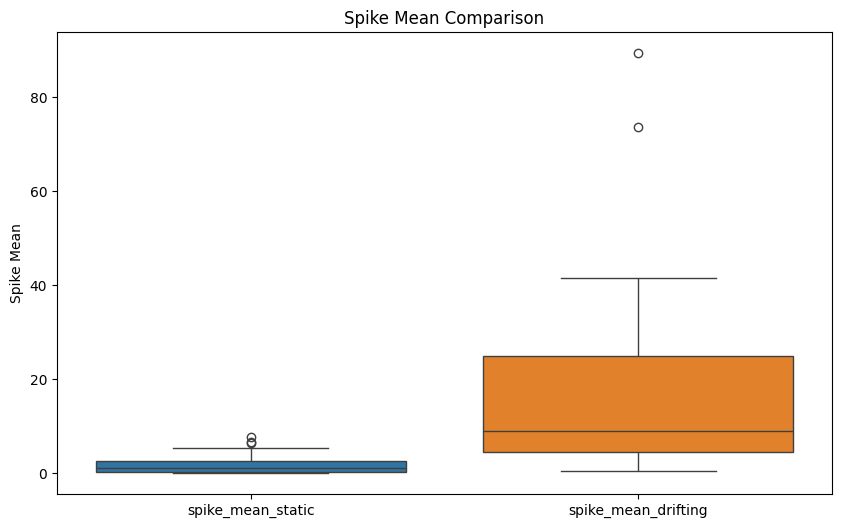

In [65]:
# Summary statistics
print(merged_spikes[['spike_mean_static', 'spike_mean_drifting']].describe())

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_spikes[['spike_mean_static', 'spike_mean_drifting']])
plt.title('Spike Mean Comparison')
plt.ylabel('Spike Mean')
plt.show()



### Hypothesis testing 

H0: there is no difference in mean number of spikes between drifting and static gratings

In [ ]:
# Shapiro-Wilk test for normality

merged_spikes['diff'] = merged_spikes['spike_mean_drifting'] - merged_spikes['spike_mean_static']

shapiro_stat, shapiro_p = stats.shapiro(merged_spikes['diff'])
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")

# we select alpha as 0.05
alpha = 0.05
if shapiro_p > alpha:
    print("Differences are normally distributed (fail to reject H0)")
else:
    print("Differences are NOT normally distributed (reject H0)")

Shapiro-Wilk p-value: 0.0000
Differences are NOT normally distributed (reject H0)


In [67]:
# Paired t-test (parametric)
t_stat, t_p = stats.ttest_rel(merged_spikes['spike_mean_static'], merged_spikes['spike_mean_drifting'])
print(f"Paired t-test p-value: {t_p:.4f}")

# Wilcoxon signed-rank test (non-parametric)
wilcoxon_stat, wilcoxon_p = stats.wilcoxon(merged_spikes['spike_mean_static'], merged_spikes['spike_mean_drifting'])
print(f"Wilcoxon p-value: {wilcoxon_p:.4f}")

Paired t-test p-value: 0.0000
Wilcoxon p-value: 0.0000


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = merged_spikes[['spike_mean_drifting', 'spike_mean_static']]
y = np.where(merged_spikes['spike_mean_drifting'] > merged_spikes['spike_mean_static'], 1, 0)  # Binary label

clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)
print(f"Classification Accuracy: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

Classification Accuracy: 1.000 ± 0.000
